# Tarea 2
__Curso:__ Deep Learning 2021 

__Programa:__ MDS

__Profesor:__ [Gonzalo Ruz](https://ingenieria.uai.cl/profesor/gonzalo-ruz/)

__Ayudante:__ Anthony Cho

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea2_Gorostio_Acosta.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ lunes 5 de julio, 23:55 hrs.

## Pregunta 2
El conjunto de datos CIFAR10 contiene 60000 imágenes en color en 10 clases, con 6000 imágenes en cada clase. El conjunto de datos se divide en 50000 imágenes de entrenamiento y 10000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

Las 10 clases corresponden a: 

airplane : 0

automobile : 1

bird : 2

cat : 3 

deer : 4 

dog : 5 

frog : 6 

horse : 7 

ship : 8 

truck : 9

Puede cargar las imágenes de la siguiente manera

In [32]:
## Librerias

## Datos
from keras.datasets import cifar10

## Preprocesamiento
import numpy
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

## Metricas
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt

## Modelo
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [33]:
## Carga de datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Visualizando los datos

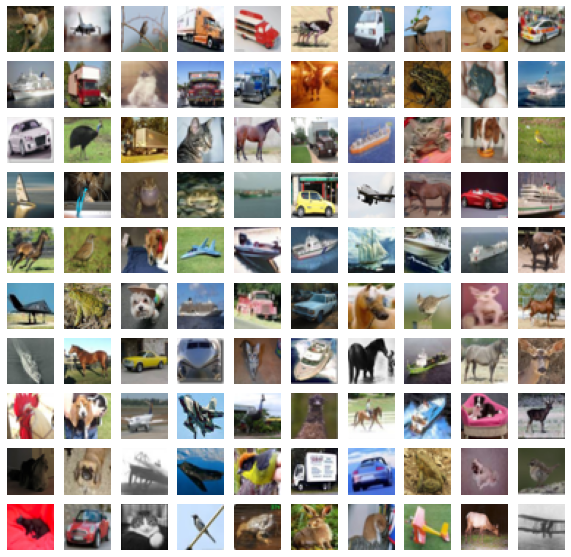

In [34]:
import numpy as np
import matplotlib.pyplot as plt

ROWS = 10

x = X_train.astype("uint8")

fig, axes1 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
    for k in range(ROWS):
        i = np.random.choice(range(len(x)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x[i:i+1][0])

<function matplotlib.pyplot.show(close=None, block=None)>

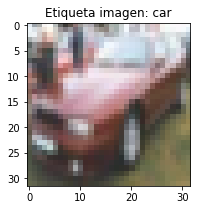

In [35]:
## Visualizando imagenes y clase
label_name = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

indice = 94
img = X_train[indice]
label = y_train[indice]

plt.figure(figsize=(3,3))
plt.title('Etiqueta imagen: {}'.format(label_name[int(label)]))
plt.imshow(img)
plt.show

In [36]:
print ("Dimensiones X_train:", X_train.shape)
print ("Dimensiones X_test:",X_test.shape)
print ("Dimensiones y_train:",y_train.shape)
print ("Dimensiones y_test:",y_test.shape)

Dimensiones X_train: (50000, 32, 32, 3)
Dimensiones X_test: (10000, 32, 32, 3)
Dimensiones y_train: (50000, 1)
Dimensiones y_test: (10000, 1)


In [37]:
#NOrmalizacion
X_train = X_train.astype('float32') /255.0
X_test = X_test.astype('float32') /255.0

In [38]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]
print("Numero de clases:", num_classes)
print('Ejemplo formato de vector respuesta:', y_test[0])

Numero de clases: 10
Ejemplo formato de vector respuesta: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Implemente una convnet convencional (usando capas de convolución y max pooling) para entrenar un modelo que pueda clasificar las imágenes de la mejor manera posible.

En general, el accuracy para este dataset está en torno a accuracy=70% en el conjunto de prueba. Vea si puede llegar a este resultado

Luego, trate de mejorar lo que obtiene con el enfoque tradicional de la convnet, usando alguna de las técnicnas vistas en clase (regularización, uso de una convnet previamente entrenada, ajuste fino, etc.)


### Respuesta

* Se crea un modelo secuencial con 3 capas convolucionales, con capas de Dropout de 20% de neuronas al final del segundo bloque convolucional y luego de la capa densa.
* Se agrega un bloque de clasificacion con una capa densa de 64 unidades, seguidas por Dropout y luego la capa densa de clasificacion final para 10 clases.

In [39]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))

In [40]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(X_train, y_train, epochs=40, batch_size=256, verbose=1, validation_split=0.2)

#Se guarda modelo
model.save('model1_cifar.h5')

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 3s 75us/sample - loss: 1.7370 - categorical_accuracy: 0.3624 - val_loss: 1.4373 - val_categorical_accuracy: 0.4800
Epoch 2/40
40000/40000 [==============================] - 1s 34us/sample - loss: 1.3757 - categorical_accuracy: 0.5056 - val_loss: 1.3026 - val_categorical_accuracy: 0.5377
Epoch 3/40
40000/40000 [==============================] - 1s 34us/sample - loss: 1.2479 - categorical_accuracy: 0.5572 - val_loss: 1.1570 - val_categorical_accuracy: 0.5932
Epoch 4/40
40000/40000 [==============================] - 1s 34us/sample - loss: 1.1326 - categorical_accuracy: 0.6030 - val_loss: 1.0952 - val_categorical_accuracy: 0.6127
Epoch 5/40
40000/40000 [==============================] - 1s 34us/sample - loss: 1.0544 - categorical_accuracy: 0.6273 - val_loss: 1.0360 - val_categorical_accuracy: 0.6340
Epoch 6/40
40000/40000 [==============================] - 1s 34us/sample - loss: 0.98

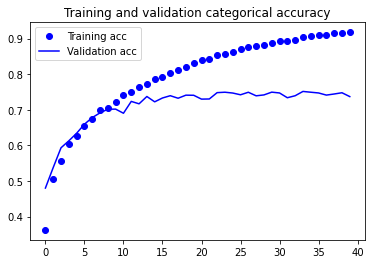

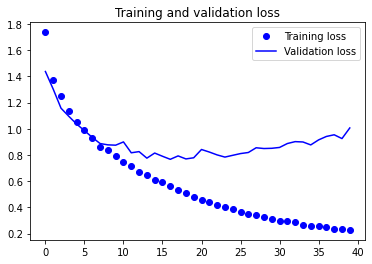

In [42]:
acc = history.history['categorical_accuracy']
val_acc =  history.history['val_categorical_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation categorical accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluacion de resultados

* Como se trata de un problema multiclase se realiza un preprocesamiento del vector de predicciones para ajustarlo a la salida del vector respuesta y se calcula categorical accuracy y matriz de confusion con los resultados por clases

In [43]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 1.0336 - categorical_accuracy: 0.7312


[1.0336292825222015, 0.7312]

In [44]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

print('Primeros 5 elementos de y_pred:', y_pred[:5])
print('Primeros 5 elementos de y_true:', y_true[:5])
print('El numero representa la categoria de la prediccion')

Primeros 5 elementos de y_pred: [5 8 8 0 6]
Primeros 5 elementos de y_true: [3 8 8 0 6]
El numero representa la categoria de la prediccion


In [45]:
#Funcion para graficar matriz de confusion
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

### Resultados y matriz de confusion

* El modelo alcanza una accuracy categorica de 0.0.7312.
* En la matriz de confusion podemos observar que los resultados son variables dependiendo de la clase.
* Los valores mas altos se observan en truck y automobile con accuracy de 0.87 y 0.85 respectivamente.
* Los valores mas bajos se obtienen en cat con accuracy de 0.52, bird y dog con 0.62.

Normalized confusion matrix


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

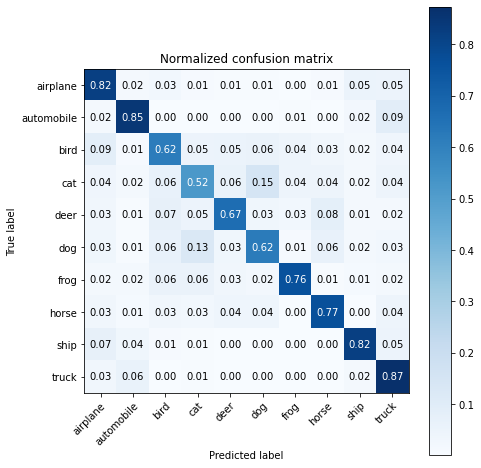

In [46]:
#confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Nombres de las clases
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot de matriz de confusion
plot_confusion_matrix(y_true, y_pred, normalize=True, classes = class_names, title='Normalized confusion matrix')

## Evaluando imagenes nuevas del grupo test

prediccion vector: [[5.10e-02 1.88e-04 1.63e-07 2.80e-08 5.24e-11 1.27e-13 1.89e-11 1.20e-12
  9.49e-01 5.50e-05]]
Prediccion Clase 8
Prediccion Etiqueta: ship
Etiqueta real: ship


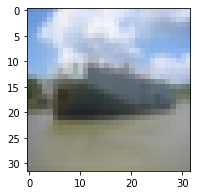

In [47]:
numero = 124

img = X_test[numero]
img_tensor = np.expand_dims(img, axis=0) 

print('prediccion vector:', model.predict(img_tensor))
print('Prediccion Clase', np.argmax(model.predict(img_tensor)))
print('Prediccion Etiqueta:', label_name[ np.argmax(model.predict(img_tensor))])
print('Etiqueta real:',  label_name[int(np.argmax(y_test[numero]))])


plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

# Modelo pre-entrenado usando Transfer Learning

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# #normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 



In [78]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# Crea un modelo base usando ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

base_model.trainable = True

## Se agregan capas de clasificacion al modelo base de la resnet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

# Capa densa clasificacion con 10 clases y funcion softmax
predictions = Dense(10, activation='softmax')(x)

# defino modelo
resNet = Model(inputs=base_model.input, outputs=predictions)

resNet.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [79]:

resNet.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = resNet.fit(X_train, y_train, epochs= 50, batch_size=256, verbose=1, validation_split=0.2)

model.save('modelResNet_cifar.h5')

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 17s 437us/sample - loss: 1.7376 - categorical_accuracy: 0.4438 - val_loss: 10.7158 - val_categorical_accuracy: 0.0975
Epoch 2/50
40000/40000 [==============================] - 12s 309us/sample - loss: 0.8544 - categorical_accuracy: 0.7052 - val_loss: 7.9953 - val_categorical_accuracy: 0.1145
Epoch 3/50
40000/40000 [==============================] - 12s 310us/sample - loss: 0.5238 - categorical_accuracy: 0.8211 - val_loss: 6.2138 - val_categorical_accuracy: 0.0939
Epoch 4/50
40000/40000 [==============================] - 12s 310us/sample - loss: 0.3150 - categorical_accuracy: 0.8943 - val_loss: 4.1965 - val_categorical_accuracy: 0.1199
Epoch 5/50
40000/40000 [==============================] - 12s 311us/sample - loss: 0.1883 - categorical_accuracy: 0.9398 - val_loss: 2.8837 - val_categorical_accuracy: 0.2856
Epoch 6/50
40000/40000 [==============================] - 12s 311us/sample

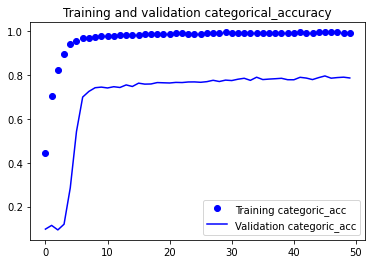

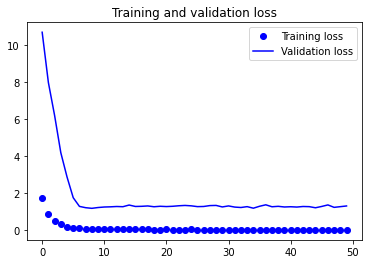

In [80]:
acc = history.history['categorical_accuracy']
val_acc =  history.history['val_categorical_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training categoric_acc')
plt.plot(epochs, val_acc, 'b', label='Validation categoric_acc')
plt.title('Training and validation categorical_accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
resNet.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 304us/sample - loss: 1.3209 - categorical_accuracy: 0.7823


[1.320891028547287, 0.7823]

In [82]:
y_pred = np.argmax(resNet.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

print('Primeros 5 elementos de y_pred:', y_pred[:5])
print('Primeros 5 elementos de y_true:', y_true[:5])
print('El numero representa la categoria de la prediccion')

Primeros 5 elementos de y_pred: [3 8 8 0 6]
Primeros 5 elementos de y_true: [3 8 8 0 6]
El numero representa la categoria de la prediccion


## Resultados y matriz de confusion

* El segundo modelo entrenado con transfer learning, usando una ResNet50 y realizando fine tunning tuvo un mejor rendimiento en la clasificacion. 
* El categorical accuracy alcanzo 0.7823 en el grupo de test.
* Tambien podemos observar en la matriz de confusion que el rendimiento de las diferentes clases tambien fue mejor.
* Asi por ejemplo los valores mas altos de accuracy fueron en ship y truck con 0.87 y 0.88 respectivamente.
* El valor mas bajo fue en cat con 0.64.

Normalized confusion matrix


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

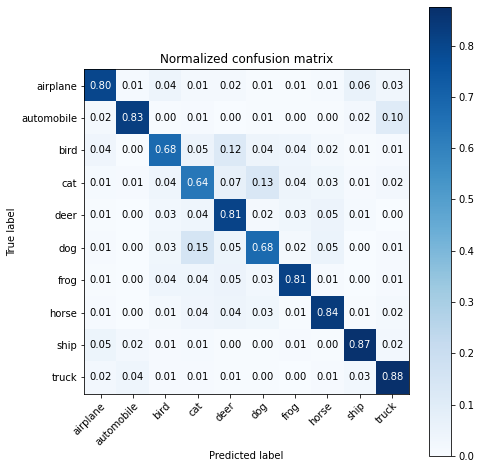

In [83]:
#confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Nombres de las clases
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot de matriz de confusion
plot_confusion_matrix(y_true, y_pred, normalize=True, classes = class_names, title='Normalized confusion matrix')

### Visualizando las predicciones de la ResNet en conjunto X_test

prediccion vector: [[1.05e-13 4.46e-15 1.00e+00 1.01e-14 9.25e-15 5.72e-15 3.47e-13 4.72e-16
  5.00e-15 7.26e-15]]
Prediccion Clase 2
Prediccion Etiqueta: bird
Etiqueta real: bird


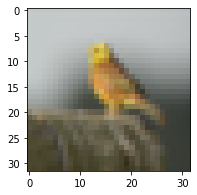

In [84]:
numero = 758

img = X_test[numero]
img_tensor = np.expand_dims(img, axis=0) 

print('prediccion vector:', resNet.predict(img_tensor))
print('Prediccion Clase', np.argmax(resNet.predict(img_tensor)))
print('Prediccion Etiqueta:', label_name[ np.argmax(resNet.predict(img_tensor))])
print('Etiqueta real:',  label_name[int(np.argmax(y_test[numero]))])


plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()